# Testing Zero-Inflated Count Matrix Factorization in Pollen data 

In [1]:
from pCMF.misc import utils, plot_utils, print_utils
from pCMF.misc.model_wrapper import ModelWrapper
from pCMF.models.pcmf import pcmf

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

import pandas as pd
from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
expression_path = '../data/Pollen//expression.csv'
labels_path = '../data/Pollen//labels.csv'

In [3]:
X_log, y = pd.read_csv(expression_path), pd.read_csv(labels_path)

In [4]:
X_log.shape

(6982, 250)

In [5]:
X_log.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1,0.0000,0.00000,0.0,2.52370,0.0000,2.5237,0.00000,1.3802,0.00000,...,3.4681,2.0334,0.00000,0.00000,0.0000,2.80750,0.0000,0.0000,0.00000,0.00000
1,2,0.0000,2.08990,0.0,0.00000,2.5843,0.8451,3.20280,0.0000,0.30103,...,0.0000,0.0000,0.30103,0.00000,0.0000,0.00000,0.0000,2.5563,0.00000,0.00000
2,3,1.1139,2.32630,0.0,1.95900,2.4728,2.6435,1.38020,1.4472,1.95420,...,0.0000,0.0000,0.00000,0.30103,0.0000,0.47712,0.0000,0.0000,0.00000,0.30103
3,4,1.2788,0.30103,0.0,0.60206,2.6365,2.2672,0.69897,2.5647,1.11390,...,0.0000,2.0899,0.00000,0.47712,4.0785,0.00000,1.8195,4.0559,0.77815,2.57750
4,5,0.0000,2.72180,0.0,1.82610,1.7559,1.8129,0.00000,0.0000,1.99120,...,0.0000,0.0000,0.00000,0.00000,0.0000,2.96660,0.0000,0.0000,0.00000,0.00000


In [6]:
X_log = X_log.drop(X_log.columns[0], axis=1)

In [7]:
X_log.shape

(6982, 249)

In [8]:
X_log = np.array(X_log.T)

In [9]:
y = y.drop(y.columns[0], axis=1)

In [10]:
y = np.array(y).ravel()

## Look at the normalized log-counts distribution

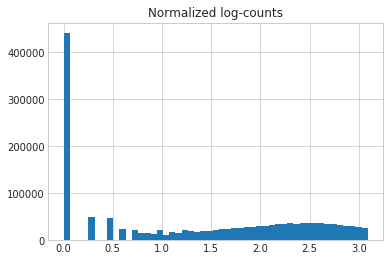

In [11]:
sortedex = np.sort(X_log.flatten())[:int(0.9*X_log.size)]

bins = np.linspace(0, sortedex.max(), num=50)

plt.hist(sortedex, bins)
plt.title('Normalized log-counts')
plt.show()

In [12]:
X = np.exp(X_log) - 1

In [13]:
X = np.round(X)

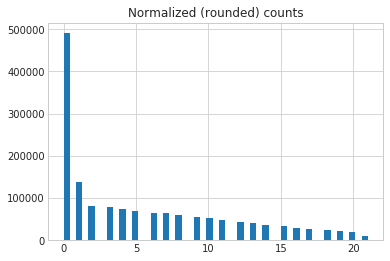

In [14]:
sortedex = np.sort(X.flatten())[:int(0.9*X.size)]

bins = np.linspace(0, sortedex.max(), num=50)

plt.hist(sortedex, bins)
plt.title('Normalized (rounded) counts')
plt.show()

In [15]:
# Run PCA
print('Running PCA...')
obj = PCA(n_components=10)
pca = ModelWrapper(X_log, y, name='PCA')
pca.run(obj.fit_transform)
print('Done.\n')

Running PCA...
Done.



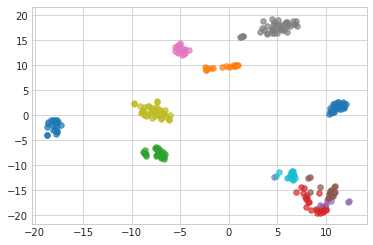

In [16]:
plot_utils.plot_tsne(pca.proj_2d, pca.c_train)

In [22]:
T = 60 * 20
S = 1
max_iter = 1000

In [23]:
print('Running PCMF...')
cavi = pcmf.PCMF(X, y)
cavi.run(max_iter=max_iter, max_time=T, sampling_rate=S, do_imp=False, do_holl=False, do_dll=False, verbose=True)
print('Done.\n')

Running PCMF...
CAVI-EB:
Considering zero-inflated counts.
Considering loading sparsity.
Running CAVI-EB...
Iteration 12/1000. Log-likelihood: -91.465. Elapsed: 0h20m39s
Done.



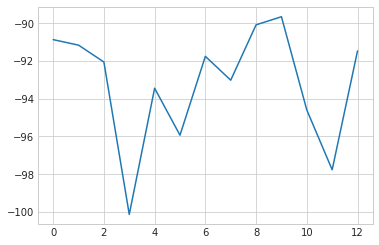

In [24]:
plot_utils.plot_model_convergence([cavi], 'll_it')

In [25]:
print_utils.print_model_silhouettes([cavi, pca])

Silhouette scores:
- PCA: 0.541968
- CAVI-EB: -0.0638956


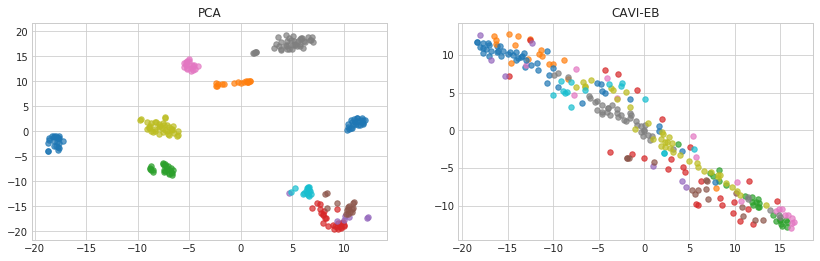

In [26]:
fig = plt.figure(figsize=(14, 4))
ax = plt.axes()
plot_utils.plot_sorted_tsnes([pca, cavi], y, ax=ax)
plt.show()